In [71]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("white")

In [64]:
results_mri = "../results_2802.csv"
clinical_data = "../dataset_riemer_lastrevision_february27th.xlsx"
clinical_data_explanations = "../explanations_riemer_lastrevision_february27th.xlsx"
t1we_image_folder = "/Users/signehogstad/masterproject/T1WE_2802"

## Read file with MRI data

In [9]:
with open(results_mri) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    results = []
    for row in csv_reader:
        for i_col in range(230):
        
            results.append([])
            results[i_col].append(row[i_col])

In [10]:
df = pd.read_csv(results_mri, index_col=[0,1])
# Calculate the correlation matrix
corr = df.corr()
print(df)


                        SN CROWN_PD_MAP  SN_R CROWN_PD_MAP  SN_L CROWN_PD_MAP  \
personal_id patient_id                                                          
01-0002     0000997A            668.026         671.701887         663.880851   
01-0003     0000991B            686.626         685.528302         687.863830   
01-0004     0000DAD2            645.394         642.109434         649.097872   
01-0005     00006431            675.596         664.422642         688.195745   
01-0006     00001573            700.828         698.554717         703.391489   
...                                 ...                ...                ...   
02-0012     000040B3            648.066         648.701887         647.348936   
02-0021     00008C1B            663.218         635.773585         694.165957   
02-0023     0000CAAB            644.144         641.052830         647.629787   
02-0024     000090BE            680.552         677.833962         683.617021   
02-0028     00008289        

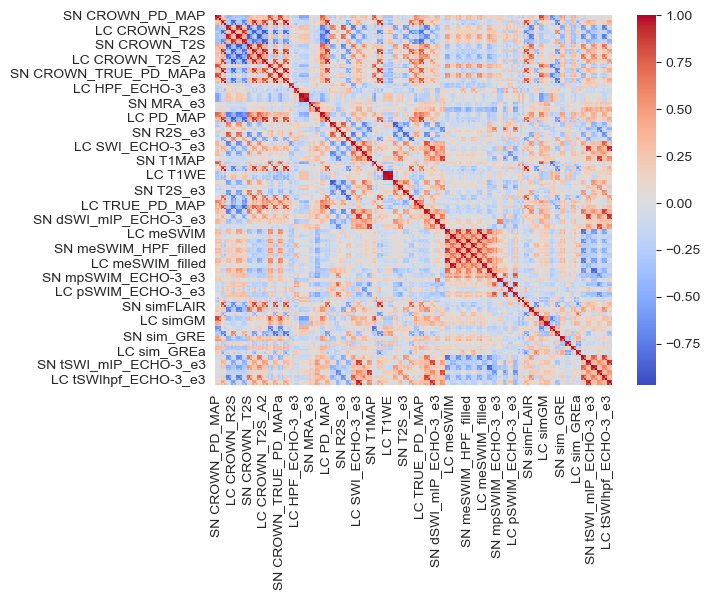

In [11]:
# Visualize the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm')

# Show the plot
plt.show()

<AxesSubplot:>

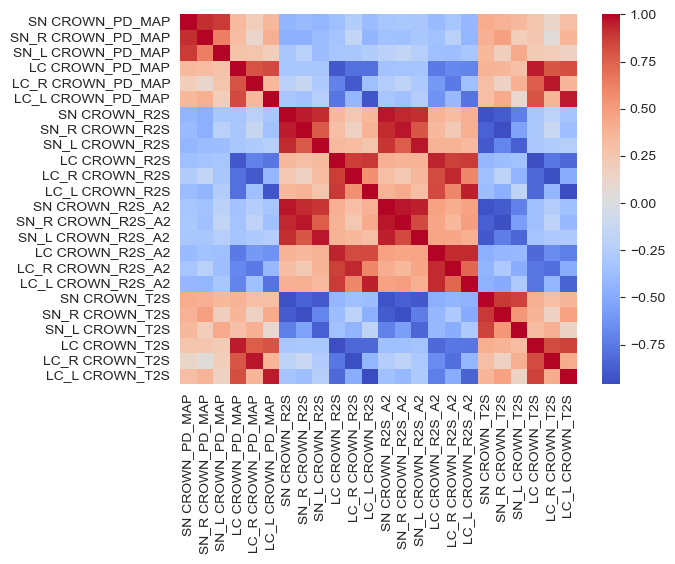

In [12]:
sns.heatmap(corr.iloc[:24,:24], cmap='coolwarm')

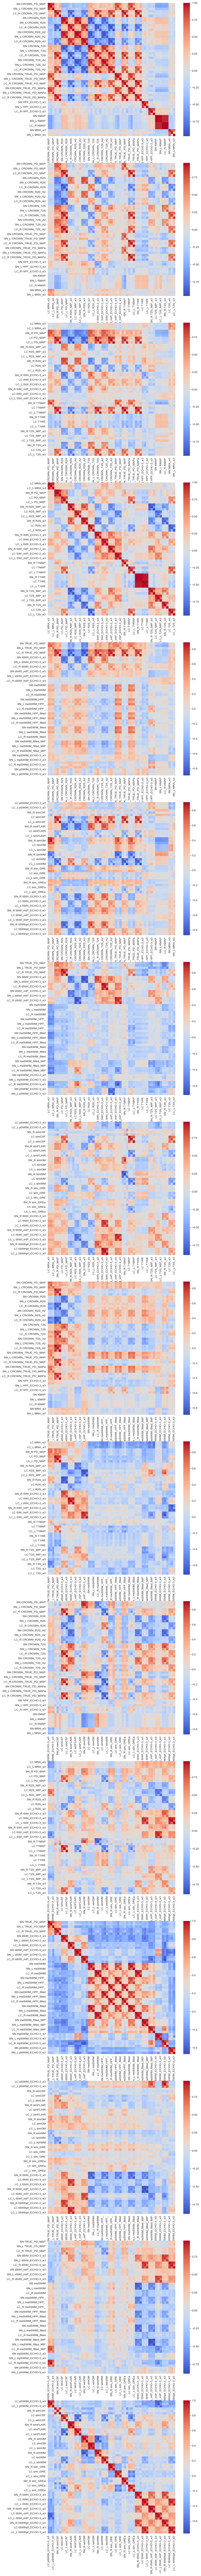

In [13]:
# Divide the correlation matrix into 16 subplots
f, ax = plt.subplots(16, figsize=(10, 160))

# Plot the heatmaps in the subplots
sns.heatmap(corr.iloc[:57,:57], ax=ax[0], cmap='coolwarm')
sns.heatmap(corr.iloc[:57,57:114], ax=ax[1], cmap='coolwarm')
sns.heatmap(corr.iloc[57:114,:57], ax=ax[2], cmap='coolwarm')
sns.heatmap(corr.iloc[57:114,57:114], ax=ax[3], cmap='coolwarm')

sns.heatmap(corr.iloc[114:171,:57], ax=ax[4], cmap='coolwarm')
sns.heatmap(corr.iloc[171:,:57], ax=ax[5], cmap='coolwarm')
sns.heatmap(corr.iloc[114:171,57:114], ax=ax[6], cmap='coolwarm')
sns.heatmap(corr.iloc[171:,57:114], ax=ax[7], cmap='coolwarm')

sns.heatmap(corr.iloc[:57,114:171], ax=ax[8], cmap='coolwarm')
sns.heatmap(corr.iloc[57:114,114:171], ax=ax[9], cmap='coolwarm')
sns.heatmap(corr.iloc[:57,171:], ax=ax[10], cmap='coolwarm')
sns.heatmap(corr.iloc[57:114,171:], ax=ax[11], cmap='coolwarm')

sns.heatmap(corr.iloc[114:171,114:171], ax=ax[12], cmap='coolwarm')
sns.heatmap(corr.iloc[171:,114:171], ax=ax[13], cmap='coolwarm')
sns.heatmap(corr.iloc[114:171,171:], ax=ax[14], cmap='coolwarm')
sns.heatmap(corr.iloc[171:,171:], ax=ax[15], cmap='coolwarm')

# Show the plot
plt.show()


In [14]:
print(df.shape)

# Feature matrix
X = df.values
print(X)

(81, 228)
[[668.026    671.701887 663.880851 ... 194.482143 181.614286 207.35    ]
 [686.626    685.528302 687.86383  ... 209.310714 209.642857 208.978571]
 [645.394    642.109434 649.097872 ... 235.475    234.142857 236.807143]
 ...
 [644.144    641.05283  647.629787 ... 234.010714 240.364286 227.657143]
 [680.552    677.833962 683.617021 ... 233.189286 230.278571 236.1     ]
 [658.166    658.69434  657.570213 ... 201.764286 201.55     201.978571]]


In [15]:
print(df.index)

MultiIndex([('01-0002', '0000997A'),
            ('01-0003', '0000991B'),
            ('01-0004', '0000DAD2'),
            ('01-0005', '00006431'),
            ('01-0006', '00001573'),
            ('01-0007', '0000F8F8'),
            ('01-0008', '0000CC09'),
            ('01-0009', '00003848'),
            ('01-0010', '0000565C'),
            ('01-0011', '00000A67'),
            ('01-0012', '00004510'),
            ('01-0013', '0000EF8B'),
            ('01-0014', '00004E2A'),
            ('01-0015', '00005316'),
            ('01-0016', '0000F262'),
            ('01-0017', '0000D2D0'),
            ('01-0018', '000037D3'),
            ('01-0019', '00007CE3'),
            ('01-0020', '0000F810'),
            ('01-0021', '000038BE'),
            ('01-0022', '0000F633'),
            ('01-0023', '00000172'),
            ('01-0024', '0000AA56'),
            ('01-0025', '000090DC'),
            ('01-0026', '0000C65E'),
            ('01-0027', '000096EB'),
            ('01-0029', '0000868E'),
 

### Standardise

In [16]:
from sklearn.preprocessing import StandardScaler

# Create the object
scaler = StandardScaler()
# Calculate the mean and standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

### Choose the right number of dimensions

In [17]:
from sklearn.decomposition import PCA 

pca_228 = PCA(n_components=None, random_state=2020)
pca_228.fit(X_scaled)
X_pca_228 = pca_228.transform(X_scaled)
print("Variance explained by all principal components: ")
print(sum(pca_228.explained_variance_ratio_ * 100))

Variance explained by all principal components: 
99.99999999999999


In [18]:
pca_228.explained_variance_ratio_ * 100

array([2.01605239e+01, 1.23196132e+01, 1.03991149e+01, 8.60701304e+00,
       6.37190974e+00, 4.98176514e+00, 4.09336105e+00, 3.58094682e+00,
       3.12573481e+00, 2.75624218e+00, 2.47552685e+00, 2.06155245e+00,
       1.87744665e+00, 1.60023020e+00, 1.34852845e+00, 1.32420103e+00,
       1.20050319e+00, 1.12412491e+00, 1.00119331e+00, 9.30548967e-01,
       8.05742943e-01, 6.87668919e-01, 6.65050466e-01, 5.75054740e-01,
       5.29158285e-01, 4.86648557e-01, 4.67841929e-01, 3.82567829e-01,
       3.65943721e-01, 3.39098968e-01, 3.18044617e-01, 2.68642122e-01,
       2.48915956e-01, 2.21280692e-01, 2.16729825e-01, 1.75174264e-01,
       1.69960210e-01, 1.58035777e-01, 1.42411418e-01, 1.33939299e-01,
       1.15587199e-01, 1.11233000e-01, 1.03603544e-01, 9.18035102e-02,
       8.76947159e-02, 7.85629472e-02, 6.38694709e-02, 5.54379127e-02,
       5.47838916e-02, 4.60001893e-02, 4.39442589e-02, 4.18726786e-02,
       4.05108529e-02, 3.92261953e-02, 3.45270103e-02, 3.33411637e-02,
      

In [19]:
# Cumulative explained variance [%]
np.cumsum (pca_228.explained_variance_ratio_ * 100)

array([ 20.16052389,  32.48013705,  42.87925195,  51.48626499,
        57.85817473,  62.83993987,  66.93330092,  70.51424774,
        73.63998255,  76.39622474,  78.87175158,  80.93330403,
        82.81075068,  84.41098088,  85.75950933,  87.08371036,
        88.28421355,  89.40833846,  90.40953177,  91.34008074,
        92.14582368,  92.8334926 ,  93.49854306,  94.0735978 ,
        94.60275609,  95.08940465,  95.55724658,  95.93981441,
        96.30575813,  96.64485709,  96.96290171,  97.23154383,
        97.48045979,  97.70174048,  97.91847031,  98.09364457,
        98.26360478,  98.42164056,  98.56405197,  98.69799127,
        98.81357847,  98.92481147,  99.02841502,  99.12021853,
        99.20791324,  99.28647619,  99.35034566,  99.40578357,
        99.46056746,  99.50656765,  99.55051191,  99.59238459,
        99.63289544,  99.67212164,  99.70664865,  99.73998981,
        99.77131711,  99.79761351,  99.82043276,  99.84269489,
        99.86150055,  99.87913656,  99.89358578,  99.90

Text(0, 0.5, 'Explained variance')

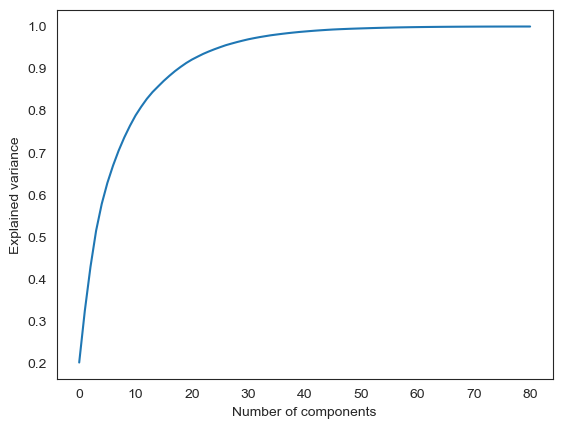

In [20]:
plt.plot(np.cumsum(pca_228.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

### Apply PCA by setting n_components=2

In [21]:
pca_2 = PCA(n_components=2, random_state=2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

Text(0, 0.5, 'Second principal component')

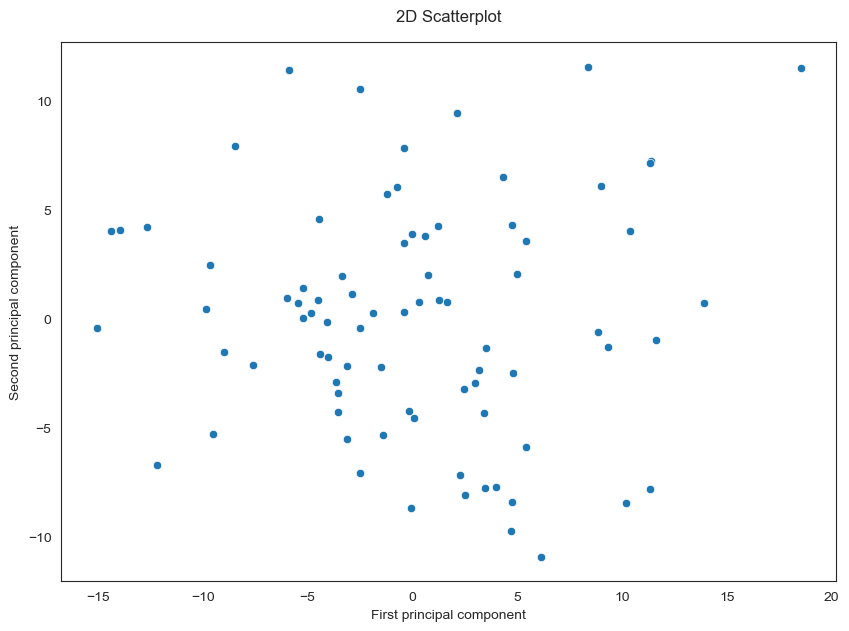

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1])
plt.title("2D Scatterplot", pad=15)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

### Apply PCA by setting n_components=3

In [23]:
pca_3 = PCA(n_components=3, random_state=2020)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

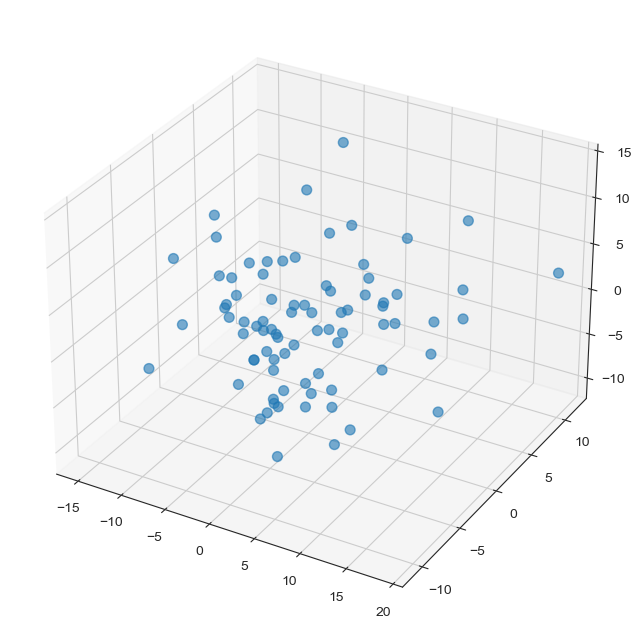

In [24]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12, 8))
ax = plt.axes (projection='3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], s=50, alpha=0.6)

## Read file with clinical data

In [32]:
df = pd.read_excel(clinical_data_explanations)
print(df.columns)

Index(['id', 'id ', 'status', 'gender', 'yearofbirth', 'ageatbaseline',
       'yearofdiagnosis', 'ageatonset_diagnosis', 'ageatonset_symptoms',
       'diseaseduration', 'mdsupdrsI', 'mdsupdrsII', 'mdsupdrsIIIcalc',
       'mdsupdrsIV', 'mdsupdrstotalcalc', 'tdpigdphenotype', 'hoehnyahr',
       'mdsnmstotal', 'mdsnmsnmf', 'moca', 'bsit'],
      dtype='object')


In [33]:
df = pd.read_excel(clinical_data, header=None)
print(df)

         0        1        2       3     4   5       6     7     8      9   \
0   01-0002  01-0002  control  female  1954  67     NaN   NaN   NaN    NaN   
1   01-0003  01-0003  patient  female  1959  62  2017.0  58.0  57.0   50.0   
2   01-0004  01-0004  control    male  1957  63     NaN   NaN   NaN    NaN   
3   01-0005  01-0005  patient  female  1952  68  2016.0  64.0  61.0   84.0   
4   01-0006  01-0006  patient  female  1960  61  2017.0  57.0  58.0   36.0   
..      ...      ...      ...     ...   ...  ..     ...   ...   ...    ...   
76  02-0012  02-0012  control    male  1954  67     NaN   NaN   NaN    NaN   
77  02-0021  02-0021  control    male  1952  69     NaN   NaN   NaN    NaN   
78  02-0023  02-0023  patient    male  1951  71  2019.0  68.0  67.0   39.0   
79  02-0024  02-0024  control  female  1947  74     NaN   NaN   NaN    NaN   
80  02-0028  02-0028  patient  female  1943  78  2014.0  71.0  67.0  130.0   

    ...    11    12   13    14    15   16    17   18    19    2

In [34]:
print(df.iloc[:43,2])

0     control
1     patient
2     control
3     patient
4     patient
5     patient
6     patient
7     patient
8     patient
9     control
10    patient
11    patient
12    patient
13    patient
14    control
15    patient
16    patient
17    control
18    patient
19    control
20    patient
21    control
22    patient
23    patient
24    control
25    patient
26    patient
27    patient
28    patient
29    control
30    patient
31    control
32    patient
33    control
34    patient
35    control
36    patient
37    control
38    patient
39    patient
40    patient
41    control
42    patient
Name: 2, dtype: object


Text(0, 0.5, 'Second principal component')

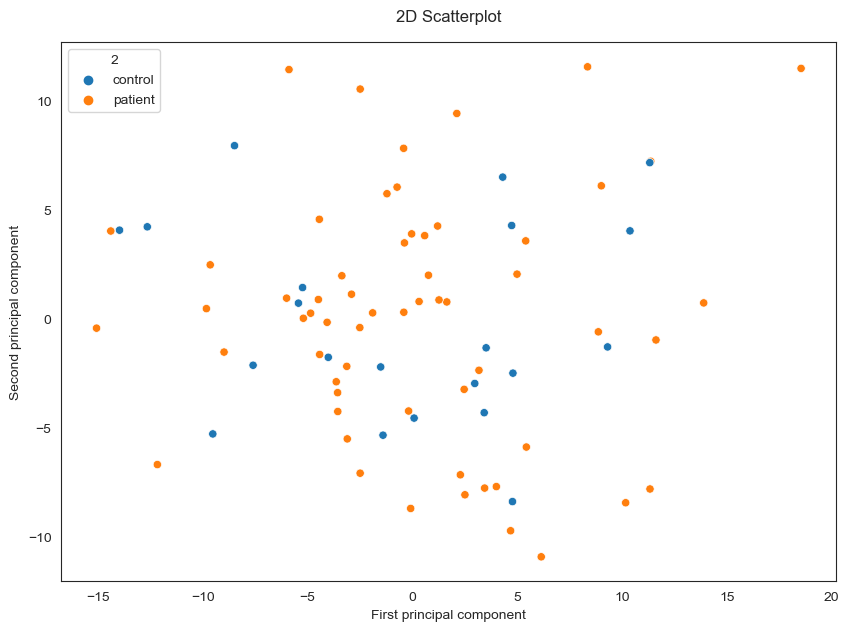

In [36]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=df.iloc[:,2])
plt.title("2D Scatterplot", pad=15)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [39]:
c = []
for status in df.iloc[:,2]:
    if status == 'control':
        c.append('blue')
    else:
        c.append('orange')
print(c)

['blue', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'orange', 'blue', 'orange']


Text(0.5, 0, 'Third principal component')

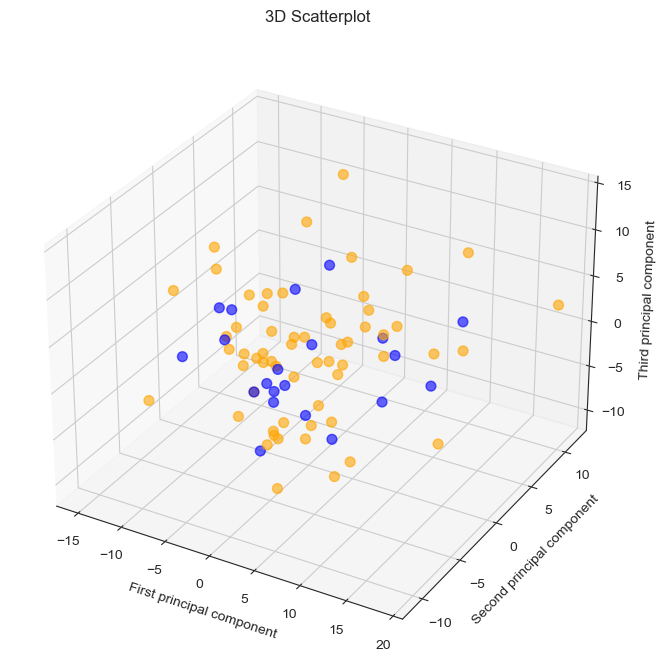

In [40]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12, 8))
ax = plt.axes (projection='3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c = c, s=50, alpha=0.6)
plt.title("3D Scatterplot", pad=15)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_zlabel("Third principal component")

## Mean and standard deviation

In [41]:

for i in range(228):
    print(results[i+2][0])
    values = np.asarray(results[i+2][1:], dtype=np.float32)
    mean = np.mean(values)
    print('Mean: ' + str(mean))
    std = np.std(values)
    print('Standard deviation: ' + str(std))
    print()

SN CROWN_PD_MAP
Mean: 654.6867
Standard deviation: 27.78204

SN_R CROWN_PD_MAP
Mean: 648.2946
Standard deviation: 32.193253

SN_L CROWN_PD_MAP
Mean: 661.8949
Standard deviation: 29.163746

LC CROWN_PD_MAP
Mean: 715.46063
Standard deviation: 48.469563

LC_R CROWN_PD_MAP
Mean: 699.1883
Standard deviation: 56.4377

LC_L CROWN_PD_MAP
Mean: 731.733
Standard deviation: 61.52695

SN CROWN_R2S
Mean: 2574.0603
Standard deviation: 374.21442

SN_R CROWN_R2S
Mean: 2618.9077
Standard deviation: 419.95956

SN_L CROWN_R2S
Mean: 2523.4875
Standard deviation: 370.95428

LC CROWN_R2S
Mean: 1554.4313
Standard deviation: 262.10022

LC_R CROWN_R2S
Mean: 1606.8967
Standard deviation: 290.88794

LC_L CROWN_R2S
Mean: 1501.9662
Standard deviation: 303.45828

SN CROWN_R2S_A2
Mean: 3062.6045
Standard deviation: 599.08545

SN_R CROWN_R2S_A2
Mean: 3106.4768
Standard deviation: 651.1572

SN_L CROWN_R2S_A2
Mean: 3013.1318
Standard deviation: 596.50604

LC CROWN_R2S_A2
Mean: 1648.6692
Standard deviation: 383.96844

L

## Histogram

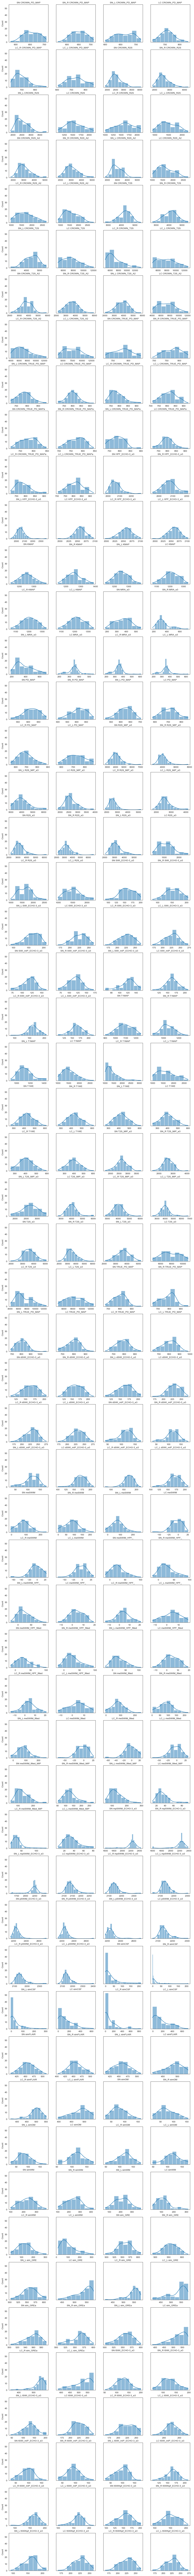

In [42]:
fig, axes = plt.subplots(57, 4, figsize=(14,199.5), sharey=True)
for j in range(57):
    for i in range(4):
        sns.histplot(ax=axes[j,i], x=np.asarray(results[4*j+i+2][1:], dtype=np.float32), kde=True)
        axes[j,i].set_title(results[4*j+i+2][0], size=10)
fig.savefig('test.png', bbox_inches='tight')

## Segmentation of SNpc and LC on T1WE image

In [43]:
import sys
import matplotlib.image as mpimg

In [65]:
sys.path.append(t1we_image_folder)
print(sys.path[-1])

/Users/signehogstad/masterproject/T1WE_2802


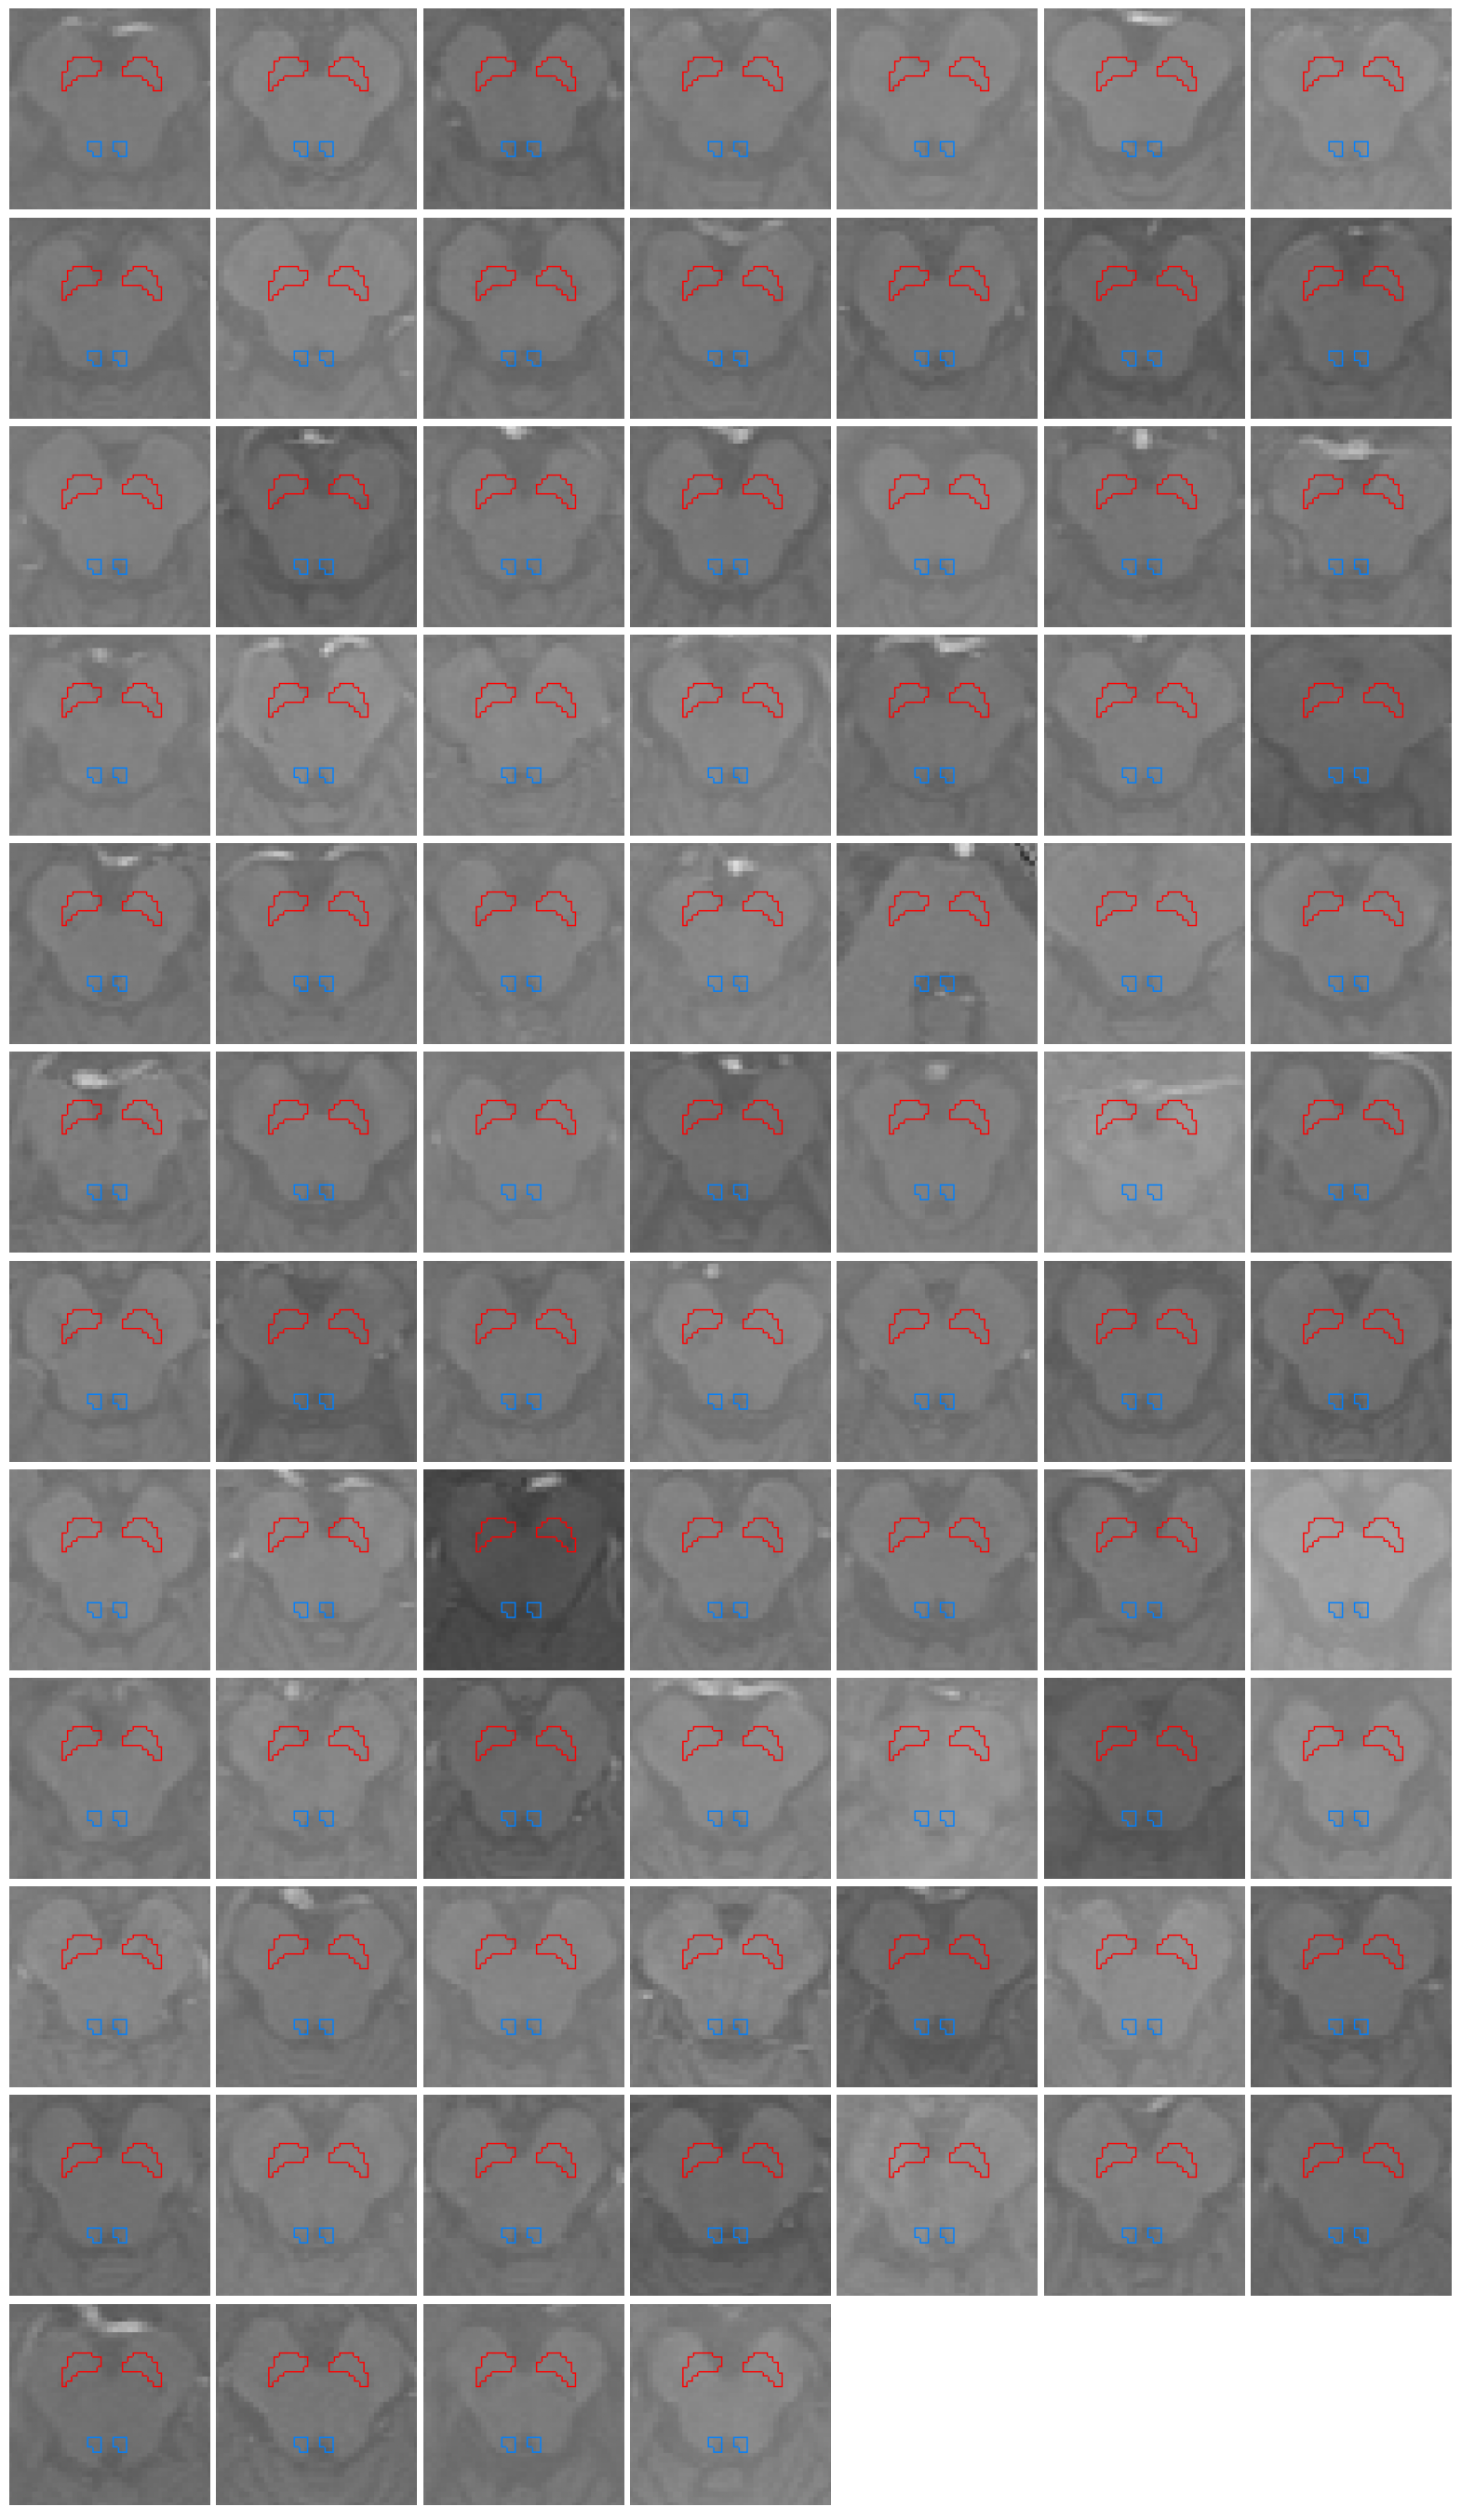

In [69]:
fig, axes = plt.subplots(12, 7, figsize=(20,35), sharey=True)
for path, directories, files in os.walk(sys.path[-1]):
    for file in files:
        img = mpimg.imread(t1we_image_folder + f"/{file}")
        index = files.index(file)
        j = index//7
        i = index%7
        axes[j,i].imshow(img)
        axes[j,i].axis('off')
        
axes[11,4].axis('off')
axes[11,5].axis('off')
axes[11,6].axis('off')
plt.subplots_adjust(wspace=0.03, hspace=-0.02)
#fig.savefig('../collage_T1WE_2802.png', bbox_inches='tight')

## Visual inspection of segmentation of SNpc and LC on T1WE image

(0.0, 1.0, 149.5, -0.5)

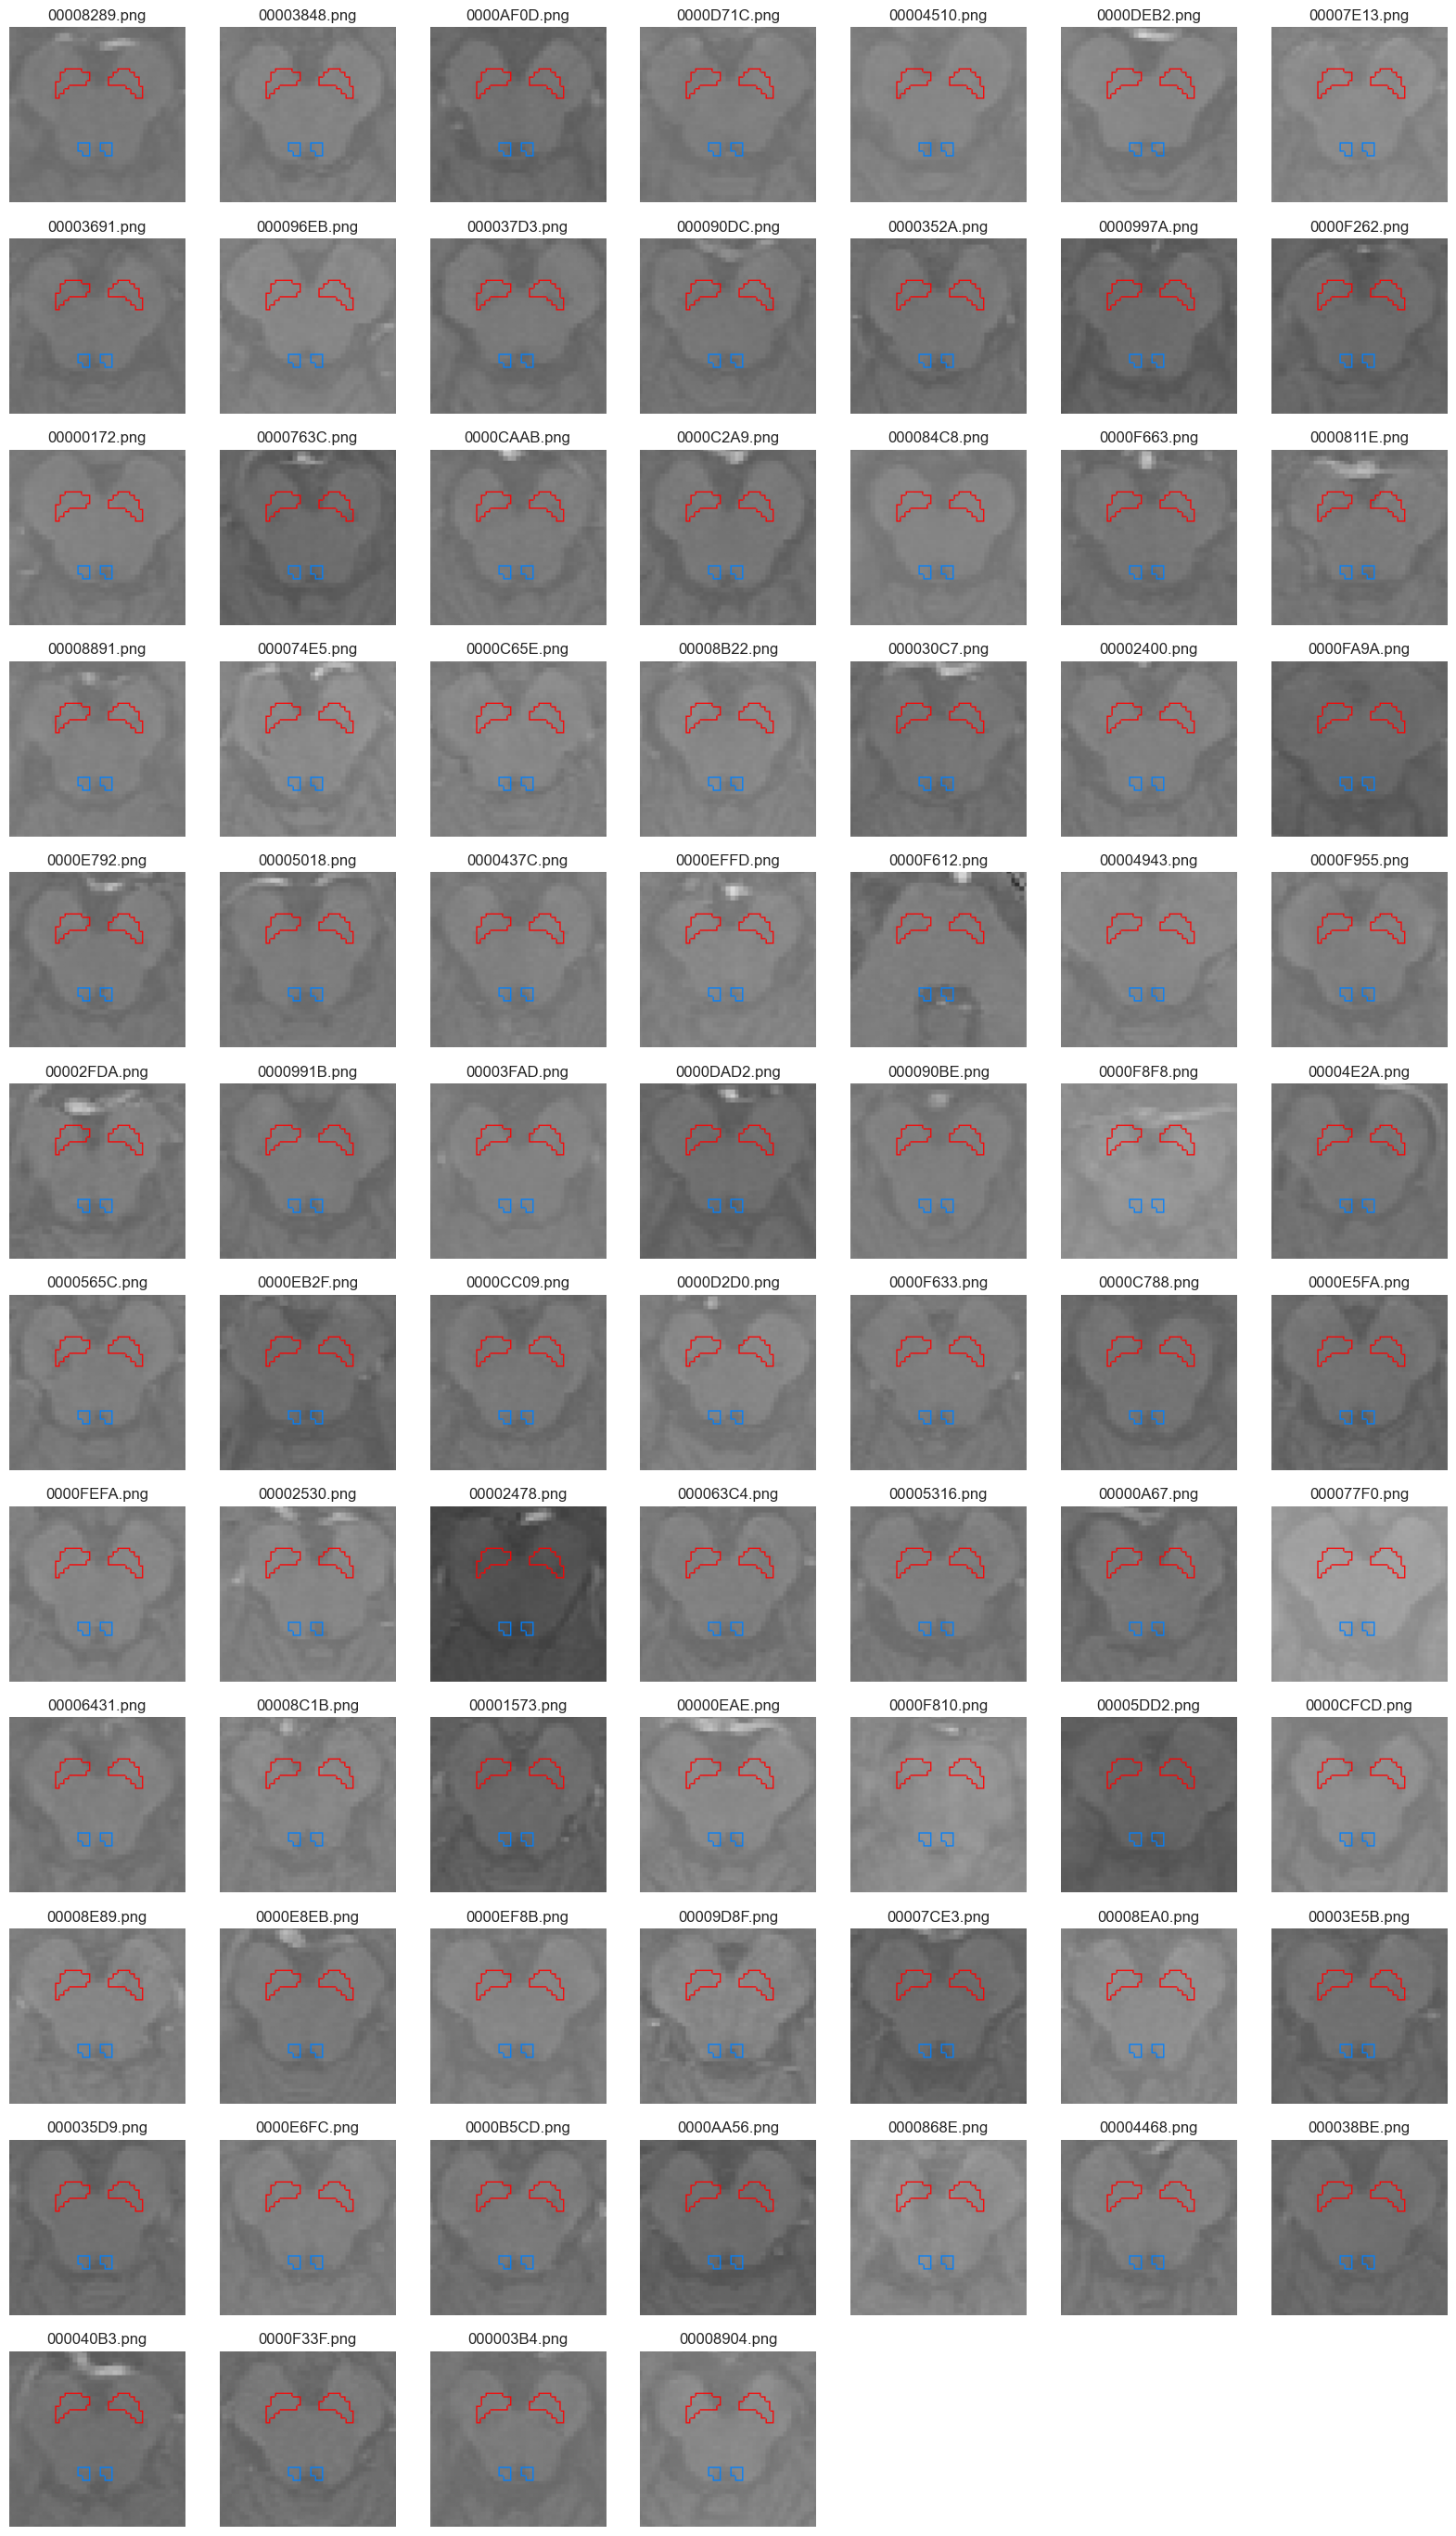

In [70]:
fig, axes = plt.subplots(12, 7, figsize=(20,35), sharey=True)
for path, directories, files in os.walk(sys.path[-1]):
    for file in files:
        img = mpimg.imread(t1we_image_folder + f"/{file}")
        index = files.index(file)
        j = index//7
        i = index%7
        axes[j,i].imshow(img)
        axes[j,i].axis('off')
        axes[j,i].set_title(file)
        
axes[11,4].axis('off')
axes[11,5].axis('off')
axes[11,6].axis('off')